# Ансамблевые методы. 
# Понижение размерности данных.
Шестаков А.В., Панов А.И. Майнор по анализу данных 24/05/2016

*Вопрос: Какие недостатки\преимущества есть у ансамблевых методов?*

# 1) Методы понижения размерности данных.

Большое количество признаков в данных - не всегда хорошо.
* Проклятие размерности!
* В признаках может быть шум, а мы не хотим использовать шумовые взаимосвязи между признаками и прогнозируемой величиной
* Мультиколлинеарность
* Далеко не все признаки вносят весомый вклад в предсказание, но если и дальше их "тащить", то это может повлиять на качество
* Неудобно смотреть на данные

Избавляться от размерности можно методами **отбора признаков (Feature Selection)** и методами **уменьшения разрмености (Feature Reduction)**

### Feature Selection
Методы делятся на три группы:
* Filter methods 
    * Признаки рассматриваются независимо друг от друга
    * Изучается индивидуальный "вклад" призника в предсказываемую переменную
    * Быстрое вычисление
* Wrapper methods
    * Идет отбор группы признаков
    * Может быть оооочень медленным, но качество, обычно, лучше чем у Filter Methods
    * Stepwise feature selection for regression
* Embedded methods
    * Отбор признаков "зашит" в модель

#### Filter method - Mutual Information
$$MI(y,x) = \sum_{x,y} p(x,y) \ln[\frac{p(x,y)}{p(x)p(y)}]$$
Сколько информации $x$ сообщает об $y$.
$$NormalizedMI(y,x) = \frac{MI(y,x)}{\sqrt{H(x)H(y)}}$$

In [24]:
from sklearn.metrics import normalized_mutual_info_score as nmi

In [27]:
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

nmi(labels_true, labels_pred)

0.52954057805756183

*Вопрос: А что делать если у нас не категориальные а вещественные признаки?*

#### Wrapper Methods - Recursive Feature Elimination

При данном подходе из модели последовательно удаляются признаки с наименьшим коэффициентом

In [13]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [14]:
X, y = make_regression(n_samples=500, n_features=4, n_informative=1, 
                       n_targets=1, tail_strength=0.5, noise=1.0, coef=False, random_state=None)

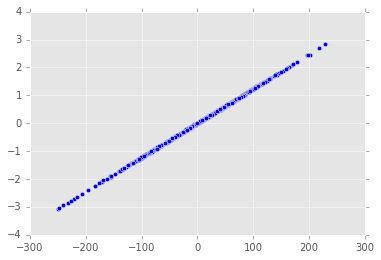

In [15]:
plt.scatter(y, X[:,1])

In [16]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1, verbose=1)

rfe.fit(X,y)

Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  estimator_params=None, n_features_to_select=1, step=1, verbose=1)

In [17]:
rfe.support_

array([False,  True, False, False], dtype=bool)

### Feature Reduction

Методы Feature Reduction производят преобразования признакового пространства, при этом пытаясь сохранить какие-то свойства данных.

PCA (Principal Component Analysis) - делаем такое линейное преобразование признаков, чтобы каждая следующая комплнента содержала в себе наибольшую изменчивость в данных.


#### Загрузите данные close_prices.csv. 
В этом файле приведены цены акций 30 компаний на закрытии торгов за каждый день периода. 

In [ ]:
# Напишите свой код

#### На загруженных данных обучите преобразование PCA с числом компоненты равным 10. 
Скольких компонент хватит, чтобы объяснить 90% дисперсии?

In [ ]:
# Напишите свой код

#### Примените построенное преобразование к исходным данным и возьмите значения первой компоненты. 

In [ ]:
# Напишите свой код

#### Загрузите информацию об индексе Доу-Джонса из файла djia_index.csv. 
Чему равна корреляция Пирсона между первой компонентой и индексом Доу-Джонса? 

In [ ]:
# Напишите свой код

#### Какая компания имеет наибольший вес в первой компоненте? 
Укажите ее название с большой буквы.

In [ ]:
# Напишите свой код

#### Работа с изображениями

In [18]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

In [19]:
digits = load_digits()
X = digits.images
y = digits.target

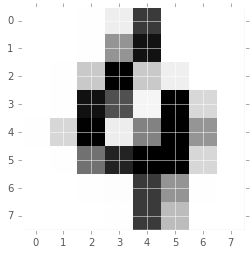

In [22]:
plt.imshow(X[100,:], cmap='Greys', interpolation='none')

In [21]:
# Перейдем от изображений к матрице объект-признак
# И сделаем PCA с помощью готовой функции в sklearn и SVD

## 2) Ансамблевые методы (Ensembles)
Не обращаясь к формулам, констатируем, что ошибку модели можно выразить через 3 компоненты: $\text{Error} = \text{Bias}^2 + \text{Variance} + \text{Noise}$
* $\text{Bias}$ (Смещение) - точность модели. Высокое смещение чаще всего означает, что модель недообучена (underfitting).
* $\text{Variance}$ (Разброс) - чувствительность модели к данным. Высокий разброс чаще всего означает, что модель переобучена (overfitting)
* $\text{Noise}$ (Шум) - это просто шум.

Для иллюстрации рассмотрим следующую картинку
<img src='http://zhangjunhd.github.io/assets/2014-10-01-bias-variance-tradeoff/1.png' width='350'>

На эти компоненты можно влиять несколькими способами, например, подбирая гиперпараметры моделей.<br/>
*Вопрос: Как меняются Bias и Variance если повышать глубину дерева решений?*

А еще, можно строить комбинации (ансамбли) моделей!

На лекции в кратце были рассмотрены два способа\алгоритма построения ансамблей.

### Bagging
Bagging - это параллельный способ построения ансамбля.<br/>
1. Обучающая выборка сэмплируется $k$ раз с помощью *bootstrap'a* (выборка с возвратом)
2. На каждом сэмпле обучается отдельная базовая модель
3. Ответы моделей усредняются (возможно с весом)
<img src='http://image.slidesharecdn.com/ipbimprovingthemodelspredictivepowerwithensembleapproaches-121203224610-phpapp02/95/improving-the-models-predictive-power-with-ensemble-approaches-10-638.jpg?cb=1354575467' width='550'>

**Теоретически, такой подход должен уменьшать Variance составляющую ошибки.**

Самый известный представитель этого метода - модель случайного леса (RandomForest). В данном случае, на каждом сэмпле базовой моделью является дерево решений.<br/>
Если вам нужно за минимальное время построить достаточно точную и устойчивую модель - это ваш вариант.

*Вопрос: Какая доля объектов в среднем попадает в один bootstrap сэмпл?*

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

#### Загрузите данные из файла abalone.csv
Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

In [6]:
# Ваш код здесь

#### Преобразуйте признак Sex в числовой
Значение F должно перейти в -1, I — в 0, M — в 1.

In [7]:
# Ваш код здесь

#### Разделите содержимое файлов на признаки и целевую переменную
В последнем столбце записана целевая переменная, в остальных — признаки.

In [8]:
# Ваш код здесь

#### Обучите случайный лес 
`sklearn.ensemble.RandomForestRegressor` - с различным числом деревьев: от 1 до 50 (не забудьте выставить `random_state=1` в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры `random_state=1` и `shuffle=True` при создании генератора кросс-валидации `sklearn.cross_validation.KFold`. В качестве меры качества воспользуйтесь долей правильных ответов (`sklearn.metrics.r2_score`).

In [9]:
# Ваш код здесь

#### Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52

In [10]:
# Ваш код здесь

#### Обратите внимание на изменение качества по мере роста числа деревьев 
Ухудшается ли оно?

In [ ]:
# Ваш код здесь

### Поработаем с данными посложнее

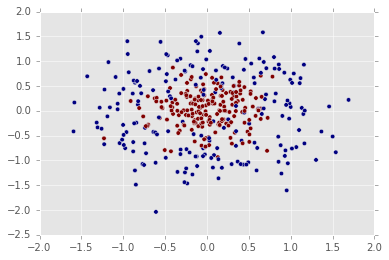

In [3]:
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [4]:
dtree = DecisionTreeClassifier(random_state=1)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

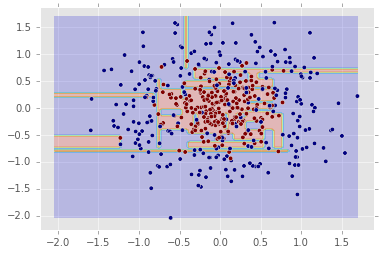

In [5]:
x_range = np.linspace(X.min(), X.max(), 100)

xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)

plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
# Выведем распределение выроятностей предсказаний
# Your code here

In [32]:
# Теперь попробуем Случайный лес
# Your code here
rf = RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

ValueError: to_rgba: Invalid rgba arg "[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]"
length of rgba sequence should be either 3 or 4

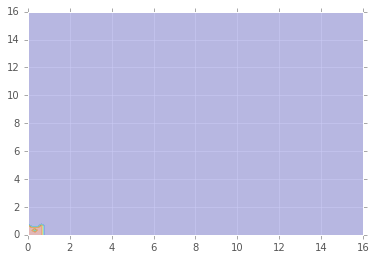

In [34]:
# Рисуем предсказания

x_range = np.linspace(X.min(), X.max(), 100)

xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)

plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y)

In [8]:
# Распределение вероятностей
# Your code here

In [ ]:
# Посмотрим, из чего складываются предсказания

for tree in rf.estimators_:
    y_hat = tree.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)

    plt.contourf(xx1, xx2, y_hat, alpha=0.02)
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
# Сравните roc-кривые для дерева и леса на тесте
# Your code here

#### Регрессия

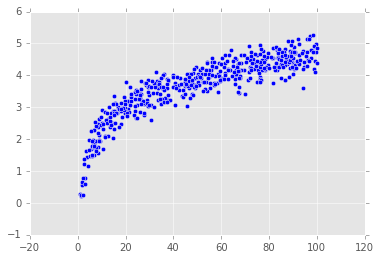

In [6]:
X = np.random.uniform(1, 100, 500)

y = np.log(X) + np.random.normal(0, .3, 500)
plt.scatter(X, y)

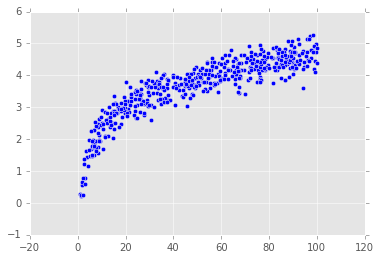

In [7]:
# Обучите модель, изобразите индивидуальные предсказания деревьев
# И устредненное предсказание леса

plt.scatter(X, y)
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X.reshape(-1,1), y)
x_range = np.linspace(X.min(), X.max(), 100)

# Your code here

### Boosting
Boosting - это последовательный способ построения ансамбля.<br/> Мы постоянно работаем с одним и тем же набором данных, **но** на каждом шаге строим новую базовую модель, которая учитывает ошибки предыдущей модели.
<img src='http://img.scoop.it/y28vFsW8QmwEYbuNp292nDl72eJkfbmt4t8yenImKBVvK0kTmF0xjctABnaLJIm9'>

**Важное ограничение накладывается на базовые модели: они должны быть НЕМНОГО лучше, чем подбрасывание монетки (weak models).** Иначе нас ждет мгновенный overfitting.

**Теоретически, такой подход должен уменьшать Bias составляющую ошибки.**

### Вновь интуиция
#### Классификация

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

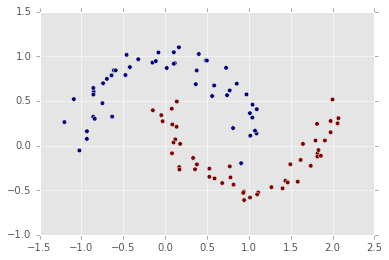

In [10]:
X, y = make_moons(noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [11]:
# Обучаем градиентный бустинг на деревьях

gbt = GradientBoostingClassifier(n_estimators=12, max_depth=2, learning_rate=0.3, subsample=1)
gbt.fit(X, y)

GradientBoostingClassifier(init=None, learning_rate=0.3, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=12,
              presort='auto', random_state=None, subsample=1, verbose=0,
              warm_start=False)

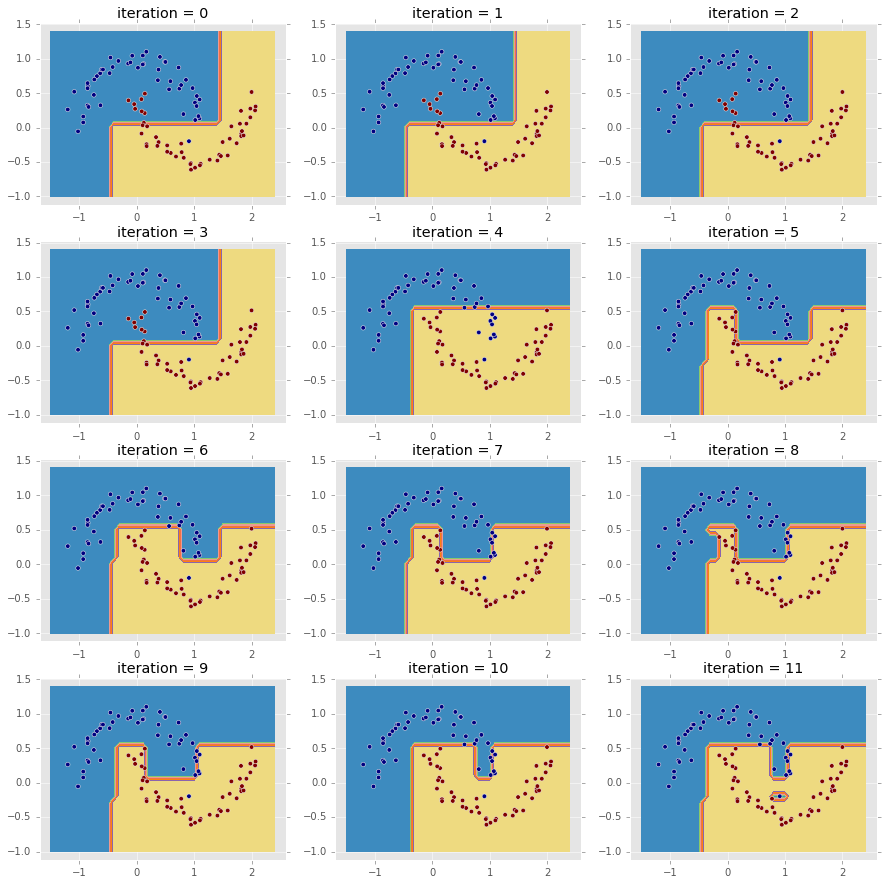

In [12]:
# Cмотрим, как изменяется предсказания с каждым новым деревом

fig, ax = plt.subplots(4,3, figsize=(15,15))
ax = ax.ravel()

xx1, xx2 = np.meshgrid(np.arange(-1.5, 2.5, 0.1),
                       np.arange(-1, 1.5, 0.1))

yy = gbt.staged_predict(np.c_[xx1.ravel(), xx2.ravel()])
for i, y_hat in enumerate(yy):
    y_hat = y_hat.reshape(xx1.shape)
    
    ax[i].set_title('iteration = %d' % i )
    ax[i].contourf(xx1, xx2, y_hat, cmap=plt.cm.Paired)
    ax[i].scatter(X[:, 0], X[:, 1], c=y)